In [2]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


In [3]:
#device
device = torch.device('cpu')

In [12]:
#hyperparameters
num_epochs = 30
batch_size = 20
learning_rate = 0.001
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

In [13]:
#MNIST
train_dataset = torchvision.datasets.CIFAR10(root='../../datasets/cifar10AnimalData', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.CIFAR10(root='../../datasets/cifar10AnimalData', train=False, transform=transform, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [14]:
train_data = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_data = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

torch.Size([20, 3, 32, 32]) torch.Size([20])


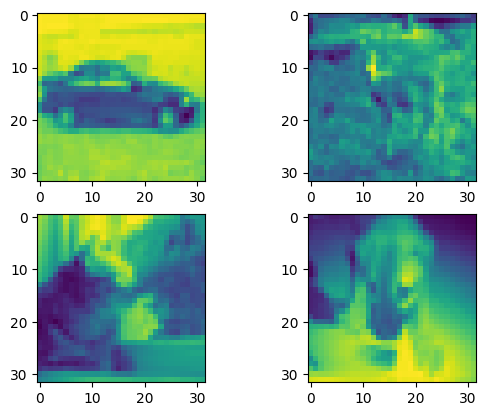

In [15]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
example = iter(train_data)
sample, labels = next(example)
print(sample.shape, labels.shape)
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(sample[i][0])
plt.show()

![Alt text](image.png)

In [16]:
# class ConvNet(nn.Module):
#     def __init__(self):
#         super(ConvNet, self).__init__()
#         self.conv1 = nn.Conv2d(3, 6, 5) #input channel size = 3(3 color channels), output channel size = 6, kernel size = 5 i.e 5x5 filter
#         self.pool = nn.MaxPool2d(2,2)
#         self.conv2 = nn.Conv2d(6, 16, 5)
#         # self.conv3 = nn.Conv2d(16, 16, 5)
#         self.fc1 = nn.Linear(16*5*5, 120) # use the above image link. Finally the image will be 5*5 with 16 channels. Hence the input size = 16*5*% fc = fullyconnected
#         self.fc2 = nn.Linear(120, 84)
#         self.fc3 = nn.Linear(84, 10)

#     def forward(self, x):
#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
#         x = x.view(-1, 16*5*5)
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x) #no softmax at the end as we include it in out loss - crossentropy
#         return x

In [17]:
class ConvNet(nn.Module):
   

    def __init__(self):
        
        super(ConvNet, self).__init__()

        self.conv_layer = nn.Sequential(

            # Conv Layer block 1
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Conv Layer block 2
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(p=0.05),

            # Conv Layer block 3
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )


        self.fc_layer = nn.Sequential(
            nn.Dropout(p=0.1),
            nn.Linear(4096, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.1),
            nn.Linear(512, 10)
        )


    def forward(self, x):
        """Perform forward."""
        
        # conv layers
        x = self.conv_layer(x)
        
        # flatten
        x = x.view(x.size(0), -1)
        
        # fc layer
        x = self.fc_layer(x)

        return x

In [18]:
model = ConvNet()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [19]:
n_total_steps = len(train_data) #totalsamples/batchsize
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_data):
        images = images.to(device)
        labels = labels.to(device)

        #forward
        y_predicted = model.forward(images)
        loss = criterion(y_predicted, labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if (i+1)%100==0:
            print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')

epoch 1/30, step 100/2500, loss = 2.2962
epoch 1/30, step 200/2500, loss = 2.2996
epoch 1/30, step 300/2500, loss = 2.2832
epoch 1/30, step 400/2500, loss = 2.3164
epoch 1/30, step 500/2500, loss = 2.2631
epoch 1/30, step 600/2500, loss = 2.2552
epoch 1/30, step 700/2500, loss = 2.2817
epoch 1/30, step 800/2500, loss = 2.2558
epoch 1/30, step 900/2500, loss = 2.2301
epoch 1/30, step 1000/2500, loss = 2.1738
epoch 1/30, step 1100/2500, loss = 2.1773
epoch 1/30, step 1200/2500, loss = 2.1841
epoch 1/30, step 1300/2500, loss = 2.2070
epoch 1/30, step 1400/2500, loss = 2.1806
epoch 1/30, step 1500/2500, loss = 2.0648
epoch 1/30, step 1600/2500, loss = 2.1326
epoch 1/30, step 1700/2500, loss = 1.9687
epoch 1/30, step 1800/2500, loss = 2.0882
epoch 1/30, step 1900/2500, loss = 2.0576
epoch 1/30, step 2000/2500, loss = 1.8409
epoch 1/30, step 2100/2500, loss = 1.8253
epoch 1/30, step 2200/2500, loss = 1.9223
epoch 1/30, step 2300/2500, loss = 1.8924
epoch 1/30, step 2400/2500, loss = 2.0643
e

In [20]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_data:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        #value, index
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
    acc = 100.0 * n_correct/n_samples
    print(f'accuracy = {acc}')

accuracy = 77.06
